## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [8]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [19]:
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [20]:
# The number of rows and columns of the dataframe
print("The number of rows: ", df.shape[0])
print("The number of columns: ", df.shape[1])

The number of rows:  4454
The number of columns:  14


Some of the features are encoded as numbers. Use the following code to de-code them:

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [5]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [6]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [7]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [30]:
# categorical variables
categorical = df.dtypes[df.dtypes == "object"]
categorical

home       object
marital    object
records    object
job        object
dtype: object

In [14]:
# numerical variables
numericals = df.dtypes[df.dtypes != "object"]
numericals

seniority    int64
time         int64
age          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
default      int32
dtype: object

In [31]:
numerical = ["seniority", "time", "age", "expenses", "income", "assets", "debt", "price"]

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [16]:
# import train_test_split for splitting the dataset into train/validation and test
from sklearn.model_selection import train_test_split

In [17]:
# split the dataframe into full_train and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
# check for the lengths of both full_train and test sets
len(df_full_train), len(df_test)

(3563, 891)

In [21]:
# split the full_train into train set and validation set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
# check the lengths of all the sets
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [25]:
# reset_indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
# create target variables from the datasets
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

In [27]:
# remove target variables from the datasets so that they are not accidentally used as X variables
del df_train["default"]
del df_val["default"]
del df_test["default"]

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [32]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print("%9s, %.3f" % (c, auc))

seniority, 0.709
     time, 0.561
      age, 0.573
 expenses, 0.501
   income, 0.682
   assets, 0.649
     debt, 0.505
    price, 0.504


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

<b>seniority</b> has the highest AUC

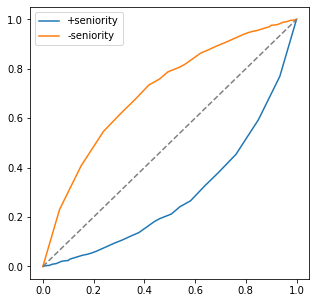

In [35]:
# plot a ROC curve for seniority
plt.figure(figsize=(5,5))

fpr, tpr, _ = roc_curve(y_train, df_train.seniority)
plt.plot(fpr, tpr, label="+seniority")

fpr, tpr, _ = roc_curve(y_train, -df_train.seniority)
plt.plot(fpr, tpr, label="-seniority")

plt.plot([0,1], [0,1], color="grey", linestyle="--")

plt.legend()
plt.show()

The ROC curve above shows the separation in distribution of seniority between positive and negative classes as shown by AUC

In [36]:
# Let's see distribution of seniority AUC on a histogram
import seaborn as sns

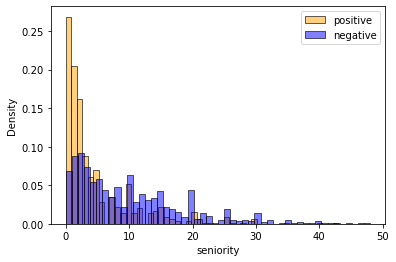

In [37]:
sns.histplot(df_train.seniority[y_train == 1], stat="density", bins=50, color="orange", alpha=0.5, label="positive")
sns.histplot(df_train.seniority[y_train == 0], stat="density", bins=50, color="blue", alpha=0.5, label="negative")

plt.legend()
plt.show()

For negative examples (blue) the values of seniority tend to be higher. That's why AUC is below 0.5 - the correlation is negative.

If we revese the order by negating the values seniority, the positive examples will tend to have higher values than negative. That's why AUC of "-seniority" is above 0.5

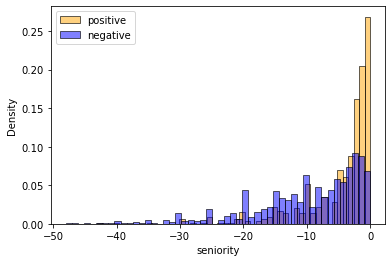

In [40]:
sns.histplot(-df_train.seniority[y_train == 1], stat="density", bins=50, color="orange", alpha=0.5, label="positive")
sns.histplot(-df_train.seniority[y_train == 0], stat="density", bins=50, color="blue", alpha=0.5, label="negative")

plt.legend()
plt.show()

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [42]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [45]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']

train_dicts = df_train[columns].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient="records")
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [49]:
# AUC score on validation set
roc_auc_score(y_val, y_pred).round(3)

0.811

In [50]:
# compare the AUC on validation set with the output of predict
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.678029873321989

This is not correct. Let's look at the ROC curves

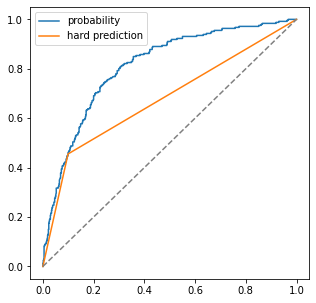

In [52]:
plt.figure(figsize=(5,5))

fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr, label="probability")

fpr, tpr, _ = roc_curve(y_val, y_pred_bin)
plt.plot(fpr, tpr, label="hard prediction")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

plt.legend()
plt.show()

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [58]:
# create a confusion matrix dataframe
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ["threshold", "tp", "fp", "fn", "tn"]
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [59]:
# use the function on validation and predict
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [60]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,246,645,0,0
10,0.1,235,445,11,200
20,0.2,216,278,30,367
30,0.3,187,172,59,473
40,0.4,148,108,98,537
50,0.5,112,64,134,581
60,0.6,78,38,168,607
70,0.7,43,15,203,630
80,0.8,22,6,224,639
90,0.9,6,2,240,643


In [61]:
# calculate precision and recall
df_scores["p"] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores["r"] = df_scores.tp / (df_scores.tp + df_scores.fn)

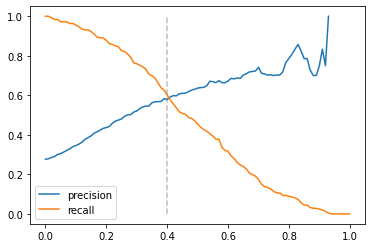

In [63]:
# plot Precision and Recall curves with respect to thresholds
plt.plot(df_scores.threshold, df_scores.p, label="precision")
plt.plot(df_scores.threshold, df_scores.r, label="recall")

plt.vlines(0.4, 0, 1, colors="grey", linestyle="--", alpha=0.5)

plt.legend()
plt.show()

At which threshold precision and recall curves intersect?

The curves intersect at 0.4 threshold

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.